## Analyse de systèmes éducatifs

### Caractéristiques Entreprise: 
- Start-up de la EdTech
- Contenus de formation
- Public de niveau lycée et université
### Mission:
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

### Sommaire
1. Analyse qualité dataset
- Import des modules
- Chargement data, constitution des dataframes
- Description des dataframes
- Suppression autres objets que pays dans liste pays
- Analyse qualité dataset (duplication, manquants)
- 1ère conclusion qualité dataset
- Analyse qualité par pays: identification des pays avec qualité acceptable
- Sélection des pays selon le niveau de qualité de leur dataset

2. Etude des indicateurs
- Typologie des indicateurs
- Principes de pertinence des sous-dicateurs vis à vis des objectifs business
- Sélection des sous-indicateurs

3. Dataset complémentaire.
- Import GDP data
- Nettoyage des données

4. Filtrage dataset: Indicateur pertinents.
- Etapes successives nettoyage indicateurs
- Constitution liste KPI finale

5. Qualité indicateurs: indicateurs presents ? nombre val. manquantes ?
- Analyse qualité par pays, par indicateur
- Sélection pays selon niveau de qualité fixé.

6. Performance pays vis à vis des indicateurs.
- Calcul taux de croissance par indicateur, par an
- Normalisation
- Liste pays fort potentiel

7. Evolution du potentiel de ces clients.
- Calcul taux de croissance estimé
- Liste des pays

8. Groupe de pays prioritaires

#### Import des modules

In [1]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import statsmodels as sm
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
!pip install xlrd==1.2.0

## 1. Analyse qualité dataset

### Chargement data, constitution des dataframes

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# chargement data: Data
path_data = '/Users/olivierdebeyssac/Open Classrooms/Data_scientist/Projet_2_Analysez des données de systèmes éducatifs/Data/Projet+Python_Dataset_Edstats_csv/EdStatsData.csv'
df_data = pd.read_csv(path_data, sep=',')

In [4]:
df_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798970 entries, 65970 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    798970 non-null  object 
 1   Country Code    798970 non-null  object 
 2   Indicator Name  798970 non-null  object 
 3   Indicator Code  798970 non-null  object 
 4   1970            68433 non-null   float64
 5   1971            31915 non-null   float64
 6   1972            31831 non-null   float64
 7   1973            31577 non-null   float64
 8   1974            31597 non-null   float64
 9   1975            82682 non-null   float64
 10  1976            33208 non-null   float64
 11  1977            33271 non-null   float64
 12  1978            33217 non-null   float64
 13  1979            32526 non-null   float64
 14  1980            84317 non-null   float64
 15  1981            34368 non-null   float64
 16  1982            33012 non-null   float64
 17  1983  

In [5]:
# chargement data: Country-series
path_country_series = '/Users/olivierdebeyssac/Open Classrooms/Data_scientist/Projet_2_Analysez des données de systèmes éducatifs/Data/Projet+Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv'
df_path_country_series = pd.read_csv(path_country_series, sep=',')

In [6]:
df_path_country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [7]:
# chargement data: Country
path_country = '/Users/olivierdebeyssac/Open Classrooms/Data_scientist/Projet_2_Analysez des données de systèmes éducatifs/Data/Projet+Python_Dataset_Edstats_csv/EdStatsCountry.csv'
df_country = pd.read_csv(path_country, sep=',')

In [8]:
# df_country.head()

In [9]:
# chargement data: footnote
path_footnote = '/Users/olivierdebeyssac/Open Classrooms/Data_scientist/Projet_2_Analysez des données de systèmes éducatifs/Data/Projet+Python_Dataset_Edstats_csv/EdStatsFootNote.csv'
df_footnote = pd.read_csv(path_footnote, sep=',')

In [10]:
df_footnote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [11]:
# chargement data: series
path_series = '/Users/olivierdebeyssac/Open Classrooms/Data_scientist/Projet_2_Analysez des données de systèmes éducatifs/Data/Projet+Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv'
df_series = pd.read_csv(path_series, sep=',')

In [12]:
# df_series.head()

### Description dataframes

In [13]:
l= [df_data, df_path_country_series, df_country, df_footnote, df_series]
names = ['data', 'country_series', 'country', 'footnote', 'series']
def description(l):
    for dataframe in l:
        print(dataframe.info())
    return

In [14]:
description(l)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### Suppression autres objets que pays dans liste pays

In [15]:
# Certaines lignes de df_country correspondent à des régions ou autres choses, non à des pays.
# Création liste régions et autres
l_misc = ['ARB','ARE', 'EAP', 'EAS', 'ECA', 'ECS', 'EMU',
          'EUU','HIC', 'MIC',
          'HPC', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 
          'LMY', 'MEA', 'MNA', 'OED', 'SSA', 'SSF',
         'UMC', 'WLD']

In [16]:
# l est une liste de miscellanous, lignes à supprimer
def supp_rows(l, df):
    for code in l:
        cond_misc = (df['Country Code'] == code)
        df.drop(df[cond_misc].index, inplace=True)
    return df


In [17]:
df_data = supp_rows(l_misc, df_data)

In [200]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798970 entries, 65970 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    798970 non-null  object 
 1   Country Code    798970 non-null  object 
 2   Indicator Name  798970 non-null  object 
 3   Indicator Code  798970 non-null  object 
 4   1970            68433 non-null   float64
 5   1971            31915 non-null   float64
 6   1972            31831 non-null   float64
 7   1973            31577 non-null   float64
 8   1974            31597 non-null   float64
 9   1975            82682 non-null   float64
 10  1976            33208 non-null   float64
 11  1977            33271 non-null   float64
 12  1978            33217 non-null   float64
 13  1979            32526 non-null   float64
 14  1980            84317 non-null   float64
 15  1981            34368 non-null   float64
 16  1982            33012 non-null   float64
 17  1983  

### Analyse qualité dataset (duplication, manquants)

In [19]:
# dataset= data
df_data.duplicated().any()

False

In [20]:
df_data.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
1970               True
                  ...  
2085               True
2090               True
2095               True
2100               True
Unnamed: 69        True
Length: 70, dtype: bool

In [21]:
l_data= [df_data]

In [22]:
def null_check(l):
    l_dict = [] # liste dict. {'année': valeur}
    thres = 0.95 # seuil de valeurs non manquantes pour déterminer le niveau de qualité acceptable.
    for k in range(4,len(l)):
        name = names[k]
        col_names = l[k].columns 
        cols = len(l[k].columns)
        nb_rows = len(l[k])
        print(nb_rows)
    
        for i in range(cols):
            col_name = col_names[i]
            non_null_values_count = l[k].loc[:, col_name].count()
            print(non_null_values_count)
            pc = round((non_null_values_count/nb_rows), 2) # pourcentage de valeurs non nulles pour chaque
      # année
            
            if pc >= thres:
                d = {col_name: pc}
                l_dict.append(d)
    if len(l_dict) == 0:
        print("Pour l'analyse par année, aucun pays ne satisfait à l'egigence de qualité")

    return l_dict

In [23]:
null_check(l_data)

Pour l'analyse par année, aucun pays ne satisfait à l'egigence de qualité


[]

### 1ère conclusion qualité dataset

#### L'analyse de la qualité du dataset faite par année montre une qualité faible.
#### Il faut maintenant faire une analyse plus fine: par année, par pays, par indicateur afin d'identifier si il y a des pays pour lesquels le taux de valeurs manquantes serait inacceptable.

### Analyse qualité par pays: identification des pays avec qualité acceptable

#### Analyse qualité par pays: identification des pays avec qualité acceptable. Pour chaque année et pour chaque pays on évalue la qualité du dataset. Si un pays est qualifié on met '1' dans un dataframe appelé 'status'. On fait ensuite un total par pays pour évaluer ceux des pays qui ont une qualité de dataset supérieure au seuil.

#### Pour la suite de l'analyse:
- On restreint la liste des df à df_data
- On réduit l'analyse à une période de 10 années, 2010 à 2019, statistiquement suffisant.
- Avec des données non estimées.


In [24]:
# Fonction pour réduire la période d'analyse
col_names = df_data.columns
# print(col_names)
non_numeric_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']

def retain_cols(l):
    l_textes = [i for i in range(2009, 2021)]
    l_textes = str(l_textes)
    
    merged_lists = [*l, *l_textes]
    numeric_cols = [x for x in merged_lists if x in l and x in l_textes]

    return numeric_cols    

In [25]:
liste_numeric_cols = retain_cols(col_names)
print(liste_numeric_cols)

['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020']


In [26]:
liste_cols = [*non_numeric_cols, *liste_numeric_cols]

In [27]:
print(liste_cols)

['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2020']


In [28]:
# On ne conserve dans cette liste des df que df_data
l_dfdata = [df_data]

In [29]:
# On modifie df_data qui devient df_data_1
df_data_1 = df_data.loc[:, liste_cols]

In [30]:
df_data_1.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
65970,North America,NAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65971,North America,NAC,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798970 entries, 65970 to 886929
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    798970 non-null  object 
 1   Country Code    798970 non-null  object 
 2   Indicator Name  798970 non-null  object 
 3   Indicator Code  798970 non-null  object 
 4   2009            133538 non-null  float64
 5   2010            232967 non-null  float64
 6   2011            137275 non-null  float64
 7   2012            138293 non-null  float64
 8   2013            128642 non-null  float64
 9   2014            105696 non-null  float64
 10  2015            128534 non-null  float64
 11  2016            15733 non-null   float64
 12  2017            143 non-null     float64
 13  2020            50820 non-null   float64
dtypes: float64(10), object(4)
memory usage: 91.4+ MB


In [32]:
df_data_1.describe()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
count,1.335380e+05,2.329670e+05,1.372750e+05,1.382930e+05,1.286420e+05,1.056960e+05,1.285340e+05,1.573300e+04,143.000000,50820.000000
mean,4.108660e+09,2.510804e+09,4.535670e+09,4.667799e+09,5.207249e+09,6.585701e+09,5.488581e+09,4.613221e+10,2.160839,288.556562
std,1.713617e+11,1.367442e+11,1.875509e+11,1.953970e+11,2.104165e+11,2.431983e+11,2.291025e+11,6.763018e+11,0.810584,4599.710995
min,-4.561240e+05,-4.969050e+05,-5.709940e+05,-6.049930e+05,-6.157480e+05,-8.900000e+01,-2.467847e+00,-1.797539e+00,1.000000,-1.870000
25%,1.156530e+01,1.220000e+00,1.200000e+01,1.079693e+01,1.286312e+01,1.590178e+01,4.000000e-01,1.800000e+01,2.000000,0.060000
50%,9.985397e+01,1.875198e+01,9.905131e+01,9.825045e+01,1.009993e+02,1.000000e+02,5.124197e+01,5.777000e+03,2.000000,0.230000
75%,1.061368e+05,2.510500e+03,9.573550e+04,9.215300e+04,1.298820e+05,1.448458e+05,6.003075e+04,5.086850e+05,3.000000,6.600000
max,1.624252e+13,1.670980e+13,1.756456e+13,1.839493e+13,1.889530e+13,1.966295e+13,2.014617e+13,2.145097e+13,4.000000,520989.750000


In [33]:
# Construction d'une liste des pays et liste kpi.
def listes(df):

    l_country_names = df.loc[:, 'Country Name'].unique().tolist()
    nb_countries = df.loc[:, 'Country Name'].nunique()
    l_kpi_names = df.loc[:, 'Indicator Name'].unique().tolist()

    return l_country_names, nb_countries, l_kpi_names
    

In [34]:
l_country_names = listes(df_data_1)[0]
print(l_country_names[0:3])

print("Nombre de pays dans df_data_1: {}".format(listes(df_data_1)[1]))

l_kpi_names = listes(df_data_1)[2]
print(l_kpi_names[0:3])


['North America', 'South Asia', 'Afghanistan']
Nombre de pays dans df_data_1: 218
['Adjusted net enrolment rate, lower secondary, both sexes (%)', 'Adjusted net enrolment rate, lower secondary, female (%)', 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)']


In [35]:
# Construction d'une liste des kpi.
l_kpi_names = df_data_1.loc[:, 'Indicator Name'].unique().tolist()
print(l_kpi_names[0:5])

['Adjusted net enrolment rate, lower secondary, both sexes (%)', 'Adjusted net enrolment rate, lower secondary, female (%)', 'Adjusted net enrolment rate, lower secondary, gender parity index (GPI)', 'Adjusted net enrolment rate, lower secondary, male (%)', 'Adjusted net enrolment rate, primary, both sexes (%)']


#### La fonction data_quality permet de juger de la qualité d'un indicateur: En principe, on a une durée qui s'étend de 2009 à 2020 avec deux années manquantes, 2018 et 2019. Soit au total 10 années. 
- Pour chaque indicateur, on compte le nombre cellules pour lesquelles on a une valeur non manquante.
- Calcul du rapport entre ce comptage et le nombre d'années (10).
- Comparaison de ce rapport avec une valeur seuil déterminée.
- La valeur seuil  est volontairement relativement basse pour ne pas exclure tous les indicateurs, compte tenu de la qualité médiocre des données.
- On exclue de l'analyse tous les indicateurs pour lesquels le rapport est en deçà de la valeur seuil.

In [36]:
# Construction fonction d'analyse qualité des indicateurs.

l_c = []
l_ind = []
l_nb_not_isna = []
l_pc_not_isna = []


def data_quality(df):
    thres = 0.60 # rapport entre nombre de valeurs non manquantes constatées et nombre de valeurs
    # non manquantes théorique.    
    
    # Pour chaque pays, pour l'ensemble des années, calculer le nombre de valeurs manquantes par rapport
    # au nombre total de valeurs.
    val = df.loc[:,'2009':'2020'].count(axis=1)
    df['Total_non_manquants'] = val
    df['Total_non_manquants_pc'] = val/(len(df.columns) - 4)
    
    
    # On supprime les lignes pour lesquelles les kpi ont un % de val. manquantes > 60%.
    df = df.drop(df[df['Total_non_manquants_pc'] < thres].index)   
    
    #df.groupby(['Country Name'])
    
    return df
      

In [37]:
df_data_2 = data_quality(df_data_1)

In [38]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46916 entries, 67212 to 886613
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            46916 non-null  object 
 1   Country Code            46916 non-null  object 
 2   Indicator Name          46916 non-null  object 
 3   Indicator Code          46916 non-null  object 
 4   2009                    46679 non-null  float64
 5   2010                    46786 non-null  float64
 6   2011                    46910 non-null  float64
 7   2012                    46905 non-null  float64
 8   2013                    46897 non-null  float64
 9   2014                    46892 non-null  float64
 10  2015                    46712 non-null  float64
 11  2016                    13651 non-null  float64
 12  2017                    0 non-null      float64
 13  2020                    0 non-null      float64
 14  Total_non_manquants     46916 non

In [39]:
df_data_2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total_non_manquants,Total_non_manquants_pc
67212,North America,NAC,GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,1.616591e+13,1.658358e+13,1.687372e+13,1.724064e+13,1.754311e+13,1.796234e+13,1.844217e+13,1.871577e+13,NaN,NaN,8,0.727273
67213,North America,NAC,GDP at market prices (current US$),NY.GDP.MKTP.CD,1.579570e+13,1.658358e+13,1.731212e+13,1.798508e+13,1.853972e+13,1.919176e+13,1.967944e+13,2.016030e+13,NaN,NaN,8,0.727273
67214,North America,NAC,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,4.748176e+04,4.828970e+04,4.875801e+04,4.942650e+04,4.991987e+04,5.071627e+04,5.168619e+04,5.206357e+04,NaN,NaN,8,0.727273
67215,North America,NAC,GDP per capita (current US$),NY.GDP.PCAP.CD,4.639438e+04,4.828970e+04,5.002482e+04,5.156070e+04,5.275578e+04,5.418749e+04,5.515376e+04,5.608194e+04,NaN,NaN,8,0.727273
67216,North America,NAC,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4.770676e+04,4.851513e+04,4.897538e+04,4.965060e+04,5.014080e+04,5.093932e+04,5.192756e+04,5.230684e+04,NaN,NaN,8,0.727273


In [40]:
df_data_2.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total_non_manquants,Total_non_manquants_pc
886251,Zimbabwe,ZWE,Theoretical duration of secondary education (y...,SE.SEC.DURS,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN,8,0.727273
886252,Zimbabwe,ZWE,Theoretical duration of upper secondary educat...,SE.SEC.DURS.UP,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,8,0.727273
886611,Zimbabwe,ZWE,"Unemployment, female (% of female labor force)",SL.UEM.TOTL.FE.ZS,6.0,4.6,6.0,5.9,5.8,5.8,5.1,4.9,NaN,NaN,8,0.727273
886612,Zimbabwe,ZWE,"Unemployment, male (% of male labor force)",SL.UEM.TOTL.MA.ZS,4.9,7.7,4.8,4.7,4.6,4.5,5.1,5.6,NaN,NaN,8,0.727273
886613,Zimbabwe,ZWE,"Unemployment, total (% of total labor force)",SL.UEM.TOTL.ZS,5.5,6.2,5.4,5.3,5.2,5.1,5.1,5.2,NaN,NaN,8,0.727273


In [41]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46916 entries, 67212 to 886613
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            46916 non-null  object 
 1   Country Code            46916 non-null  object 
 2   Indicator Name          46916 non-null  object 
 3   Indicator Code          46916 non-null  object 
 4   2009                    46679 non-null  float64
 5   2010                    46786 non-null  float64
 6   2011                    46910 non-null  float64
 7   2012                    46905 non-null  float64
 8   2013                    46897 non-null  float64
 9   2014                    46892 non-null  float64
 10  2015                    46712 non-null  float64
 11  2016                    13651 non-null  float64
 12  2017                    0 non-null      float64
 13  2020                    0 non-null      float64
 14  Total_non_manquants     46916 non

In [42]:
# cond = (df_status_1['Total_non_manquants_pc'] >= 0.85)
# df_status_1 = df_status_1.loc[cond, :]

In [43]:
l_countries = df_data_2['Country Name'].unique()
nb_countries = df_data_2['Country Name'].nunique()
print("Liste pays avec seuil qualité satisfaisant: {}".format(l_countries))
print("Nombre pays avec seuil qualité satisfaisant: {}".format(nb_countries))

Liste pays avec seuil qualité satisfaisant: ['North America' 'South Asia' 'Afghanistan' 'Albania' 'Algeria'
 'American Samoa' 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt, Arab Rep.' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia'
 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 

### Sélection des pays selon le niveau de qualité de leur dataset.

###### A ce stade, chacun des indicateurs pris en compte dans df_status a un niveau de valeurs non manquantes supérieur ou égal à 60%. 

## 2. Etude des indicateurs

### Typologie des indicateurs

Les sous-indicateurs qui caractérisent le système éducatif appartiennent à plusieurs typologies d'indicateurs. Ces typologies sont recencées sur le lien [EdStats - Available Indicators](https://datatopics.worldbank.org/education/indicators).

Il y a 19 typologies. Il est question ici de les passer en revue et de considérer leur intérêt dans la perspective de leur pertinence vis à vis des objectifs business:
- Développement international
- Métier entreprise:
  - Formation en ligne
  - Contenu orienté Tech
  - Public: secondaire et universitaire




### Principes de pertinence des sous-dicateurs vis à vis des objectifs business

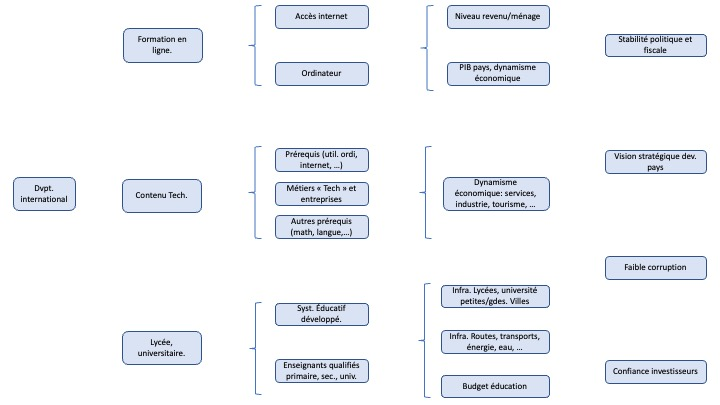

Par rapport aux objectifs business, quels sont à priori les indicateurs qui pourraient permettre de caractériser suffisamment un pays "prioritaire"?
> - Les pays où la demande de métiers avec une expertise Tech se développe. Ces pays ont une économie tirée par les secteurs des services, de l'industrie, du tourisme en particulier. Les pays dont l'économie repose essentiellement sur l'agriculture avec une ruralité forte ne sont donc pas des cibles.
> - Pays avec une stabilité politique reconnue par les autres pays.
> - Pays avec une fiscalité stable qui donne confiance aux investisseurs.
> - Pays ayant une stratégie de développement économique.
> - Pays où l'éducation supérieure (lycée, universitaire) est développée: C'est une conséquence du niveau de développement d'un pays. Plus le pays est développé, meilleure est son système d'éducation, notamment pour les niveaux collège, lycée et universitaire.
> - Pays où l'éducation supérieure consacrée aux sciences, à la tech, en particulier, se développe. Ceci traduit le développement économique du pays au travers des secteurs des services et de l'industrie en particulier.
> - Un bon niveau de formation des enseignants.
> - Un nombre d'enseignants important, notamment pour les niveaux collège, lycée et universitaire.

L'analyse requiert une information relative au PIB pays. Information qui traduit un niveau de développement social, économique, culturel et par voie de conséquence un niveau de développement du système éducatif.
On va donc compléter les datasets en important des données économiques.

### Sélection des sous-indicateurs

Avant l'import du dataset PIB, regardons les typologies d'indicateurs et leurs sous-indicateurs.

**Typologies des indicateurs consultés et sous-indicateurs présentant un interêt:**

Early Childhood Education
rien d'interessant

Primary:
rien d'interessant

Secondary:
rien d'interessant

Vocational & Post-secondary Non-Tertiary:
rien d'interessant

Tertiary:
 Percentage of graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, both sexes (%)
https://databank.worldbank.org/indicator/UIS.FOSGP.5T8.F500600700?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series


Teachers.
Teachers in secondary education, both sexes (number):
https://databank.worldbank.org/indicator/SE.SEC.TCHR?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series

Teachers in tertiary education programmes, both sexes (number):
https://databank.worldbank.org/indicator/SE.TER.TCHR?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series

Teachers in upper secondary education, both sexes (number):
https://databank.worldbank.org/indicator/UIS.T.3?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series

Expenditures: rien d'intéressant

Literacy: rien d'intéressant

Learning outcomes: rien d'interessant

Attainment: rien d'intéressant

Technology skills:
 Proportion of youth and adults who have wrote a computer program using a specialised programming language, both sexes (%):
 Pas d'info. disponible.

Population:
Population of the official entrance age to secondary general education, both sexes (number):
https://databank.worldbank.org/indicator/UIS.SAP.23.GPV.G1?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series

School age population, tertiary education, both sexes (number):
https://databank.worldbank.org/indicator/SP.TER.TOTL.IN?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series

School age population, upper secondary education, both sexes (number):
https://databank.worldbank.org/indicator/SP.SEC.UTOT.IN?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series

Labor:
Labor force with advanced education (% of total labor force):
https://databank.worldbank.org/indicator/SL.TLF.ADVN.ZS?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series

Background:
Internet users (per 100):
https://databank.worldbank.org/indicator/IT.NET.USER.P2?id=c755d342&report_name=EdStats_Indicators_Report&populartype=series

Personal computers (per 100 people):
Pas d'info.

SABER:
rien d'intéressant

Global Achievement:
rien d'intéressant

Learning Poverty:
rien d'intéressant

Education Equality:
rien d'intéressant

---



---













In [45]:
# Création liste des sous indicateurs.
l_kpi = ['Percentage of graduates from Science, Technology, Engineering and Mathematics programmes in tertiary education, both sexes (%)',
         'Teachers in secondary education, both sexes (number)',
         'Teachers in tertiary education programmes, both sexes (number)',
         'Teachers in upper secondary education, both sexes (number)',
         'School age population, upper secondary education, both sexes (number)',
         'School age population, tertiary education, both sexes (number)',
         'Labor force with advanced education (% of total labor force)',
         'Internet users (per 100)']

In [46]:
# Création serie à partir de l_kpi
s_kpi = pd.Series(l_kpi)
# Pour chaque ligne, faire un split pour restituer chaque mot et ensuite enlever ceux qui ne sont pas pertinents
s_kpi = s_kpi.str.split(' ')
print(s_kpi[0:3])

0    [Percentage, of, graduates, from, Science,, Te...
1    [Teachers, in, secondary, education,, both, se...
2    [Teachers, in, tertiary, education, programmes...
dtype: object


###### A partir de cette liste, on vérifie si l'un de ces indicateurs est présent dans la colonne 'Indicator Name' de df_data_2

Extraction de la colonne 'Indicator Name'

Test du 1er élément de la liste 'l_kpi': est ce que cet élément est dans l'objet 's_ind_name' ?
- 1ère étape: charger la liste des stop words (enlever les mots non pertinents de la recherche)

In [47]:
def reading_file(path):
    path_stop_words = "/Users/olivierdebeyssac/Open Classrooms/Data_scientist/Projet_2_Analysez des données de systèmes éducatifs/Stop_words_Regex/Stop_words/stop_words"
    with open (path, "r") as myfile:
        data = myfile.read().splitlines()
    return data

In [48]:
path_stop_words = "/Users/olivierdebeyssac/Open Classrooms/Data_scientist/Projet_2_Analysez des données de systèmes éducatifs/Stop_words_Regex/Stop_words/stop_words"

In [49]:
liste_stop_words = reading_file(path_stop_words)

In [50]:
print(liste_stop_words[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']


In [51]:
def remove_stopwords(texte):
    clean_text = [word for word in texte if word not in liste_stop_words]
    return clean_text
    

In [52]:
cleaned_kpi = s_kpi.apply(lambda x: remove_stopwords(x))

In [53]:
cleaned_kpi

0    [Percentage, graduates, Science,, Technology,,...
1    [Teachers, secondary, education,, sexes, (numb...
2    [Teachers, tertiary, education, programmes,, s...
3    [Teachers, upper, secondary, education,, sexes...
4    [School, age, population,, upper, secondary, e...
5    [School, age, population,, tertiary, education...
6    [Labor, force, advanced, education, (%, total,...
7                        [Internet, users, (per, 100)]
dtype: object

- Enlever les virgules non nécessaires et convertir la série en liste

In [54]:
cleaned_kpi = cleaned_kpi.apply(lambda x: [i.replace(",", ".") for i in x])
cleaned_kpi = cleaned_kpi.apply(lambda x: [i.replace(".", "") for i in x])


In [55]:
type(cleaned_kpi)

pandas.core.series.Series

In [56]:
cleaned_kpi

0    [Percentage, graduates, Science, Technology, E...
1    [Teachers, secondary, education, sexes, (number)]
2    [Teachers, tertiary, education, programmes, se...
3    [Teachers, upper, secondary, education, sexes,...
4    [School, age, population, upper, secondary, ed...
5    [School, age, population, tertiary, education,...
6    [Labor, force, advanced, education, (%, total,...
7                        [Internet, users, (per, 100)]
dtype: object

In [57]:
cleaned_kpi = cleaned_kpi.tolist()

In [58]:
cleaned_kpi

[['Percentage',
  'graduates',
  'Science',
  'Technology',
  'Engineering',
  'Mathematics',
  'programmes',
  'tertiary',
  'education',
  'sexes',
  '(%)'],
 ['Teachers', 'secondary', 'education', 'sexes', '(number)'],
 ['Teachers', 'tertiary', 'education', 'programmes', 'sexes', '(number)'],
 ['Teachers', 'upper', 'secondary', 'education', 'sexes', '(number)'],
 ['School',
  'age',
  'population',
  'upper',
  'secondary',
  'education',
  'sexes',
  '(number)'],
 ['School', 'age', 'population', 'tertiary', 'education', 'sexes', '(number)'],
 ['Labor', 'force', 'advanced', 'education', '(%', 'total', 'labor', 'force)'],
 ['Internet', 'users', '(per', '100)']]

### 3. Dataset complémentaire

#### Import GDP data

In [59]:
path_gdp = '/Users/olivierdebeyssac/Open Classrooms/Data_scientist/Projet_2_Analysez des données de systèmes éducatifs/Data/Projet+Python_Dataset_Edstats_csv/data supplémentaire/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4701206/API_NY_GDP_PCAP.csv'

In [60]:
df_gdp = pd.read_csv(path_gdp, sep=';')

In [61]:
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26442.426801,26895.057167,28399.050131,28453.715565,29348.418969,30253.714235,31135.884356,23384.298791,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.726325,162.555968,172.271022,199.784916,180.228774,199.517228,...,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1541.031661,1511.309259,1360.878645,1557.722682,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.930722,113.080062,118.829461,123.441089,131.852423,138.524029,...,2157.494584,2212.914095,1894.322115,1673.843681,1613.490478,1704.135698,1777.852822,1709.764129,1774.921218,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5127.717243,5094.112329,3127.890598,1728.023754,2313.220584,2524.942483,2177.799015,1631.431691,2137.909393,NaN


#### Nettoyage des données

In [62]:
# Colonnes à supprimer
years = [i for i in range(1960,2009,1)]
print((years))

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]


In [63]:
# Suppression des colonnes
for year in years:
    year = str(year)
    df_gdp.drop(year, axis=1, inplace=True)

In [64]:
df_gdp.drop(['2018','2019','2021'], axis=1, inplace=True)
df_gdp.drop(df_gdp.columns[-1],axis= 1, inplace= True)


In [65]:
df_gdp.loc[0:2,:]

,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,25170.832363,24134.473859,25849.964006,25496.843942,26442.426801,26895.057167,28399.050131,28453.715565,29348.418969,23384.298791
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,1425.307168,1659.654922,1810.229164,1777.303950,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1360.878645
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,437.268740,543.306526,591.190030,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,516.747871


In [66]:
gdp_ind_name = df_gdp.loc[:,'Indicator Name'].unique()
gdp_ind_name = pd.Series(gdp_ind_name)
gdp_ind_name = gdp_ind_name.str.split(' ')
gdp_ind_name = list(gdp_ind_name)[0]
print(gdp_ind_name)


['GDP', 'per', 'capita', '(current', 'US$)']


In [67]:
cleaned_kpi.append(gdp_ind_name)

In [68]:
cleaned_kpi

[['Percentage',
  'graduates',
  'Science',
  'Technology',
  'Engineering',
  'Mathematics',
  'programmes',
  'tertiary',
  'education',
  'sexes',
  '(%)'],
 ['Teachers', 'secondary', 'education', 'sexes', '(number)'],
 ['Teachers', 'tertiary', 'education', 'programmes', 'sexes', '(number)'],
 ['Teachers', 'upper', 'secondary', 'education', 'sexes', '(number)'],
 ['School',
  'age',
  'population',
  'upper',
  'secondary',
  'education',
  'sexes',
  '(number)'],
 ['School', 'age', 'population', 'tertiary', 'education', 'sexes', '(number)'],
 ['Labor', 'force', 'advanced', 'education', '(%', 'total', 'labor', 'force)'],
 ['Internet', 'users', '(per', '100)'],
 ['GDP', 'per', 'capita', '(current', 'US$)']]

In [69]:
print(type(cleaned_kpi))


<class 'list'>


In [70]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   2009            255 non-null    float64
 5   2010            256 non-null    float64
 6   2011            259 non-null    float64
 7   2012            257 non-null    float64
 8   2013            258 non-null    float64
 9   2014            259 non-null    float64
 10  2015            258 non-null    float64
 11  2016            257 non-null    float64
 12  2017            257 non-null    float64
 13  2020            251 non-null    float64
dtypes: float64(10), object(4)
memory usage: 29.2+ KB


In [71]:
# Suppression des pays qui sont dans df_gdp et pas dans df_data_2
df_data_3 = df_data_2[df_data_2['Country Name'].isin(df_gdp['Country Name'])]

In [72]:
df_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45652 entries, 67212 to 886613
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            45652 non-null  object 
 1   Country Code            45652 non-null  object 
 2   Indicator Name          45652 non-null  object 
 3   Indicator Code          45652 non-null  object 
 4   2009                    45416 non-null  float64
 5   2010                    45522 non-null  float64
 6   2011                    45646 non-null  float64
 7   2012                    45641 non-null  float64
 8   2013                    45633 non-null  float64
 9   2014                    45628 non-null  float64
 10  2015                    45448 non-null  float64
 11  2016                    13336 non-null  float64
 12  2017                    0 non-null      float64
 13  2020                    0 non-null      float64
 14  Total_non_manquants     45652 non

### 4. Filtrage dataset: Indicateur pertinents.

On a maintenant un dataset (df_data_3) avec plusieurs indicateurs dont GDP ajouté en dernier lieu.
C'est à partir de cette liste de kpi que l'on va sélectionner les pays qui correspondent aux objectifs business.
On va donc filtrer df_data_3 pour ne retenir que ces kpi et constituer un nouveau df avec le résultat du filtre.

#### Etapes successives nettoyage indicateurs

In [73]:
# Passer la colonne "Indicator Name" en lowercase
df_data_3['Indicator Name'] = df_data_3['Indicator Name'].str.lower()

/var/folders/vz/jqhjcz3j0xn4_ssg6jb109h00000gn/T/ipykernel_59826/1542170445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_3['Indicator Name'] = df_data_3['Indicator Name'].str.lower()


In [74]:
df_data_3['Indicator Name'][0:2]

67212    gdp at market prices (constant 2005 us$)
67213          gdp at market prices (current us$)
Name: Indicator Name, dtype: object

In [75]:
lower_kpi = [str(x).lower() for x in cleaned_kpi]

In [76]:
lower_kpi

["['percentage', 'graduates', 'science', 'technology', 'engineering', 'mathematics', 'programmes', 'tertiary', 'education', 'sexes', '(%)']",
 "['teachers', 'secondary', 'education', 'sexes', '(number)']",
 "['teachers', 'tertiary', 'education', 'programmes', 'sexes', '(number)']",
 "['teachers', 'upper', 'secondary', 'education', 'sexes', '(number)']",
 "['school', 'age', 'population', 'upper', 'secondary', 'education', 'sexes', '(number)']",
 "['school', 'age', 'population', 'tertiary', 'education', 'sexes', '(number)']",
 "['labor', 'force', 'advanced', 'education', '(%', 'total', 'labor', 'force)']",
 "['internet', 'users', '(per', '100)']",
 "['gdp', 'per', 'capita', '(current', 'us$)']"]

In [77]:
def split_sentence(l): # liste de liste de kpi
    l_kpi = []
    l_df = []
    for i in range(len(l)):
        sentence = l[i]
        s_matching = df_data_3['Indicator Name'].str.contains('|'.join(sentence))
        df_data_3[s_matching]
        
    return df_data_3
    

In [78]:
df_matching = split_sentence(lower_kpi)

In [79]:
df_matching.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total_non_manquants,Total_non_manquants_pc
67212,North America,NAC,gdp at market prices (constant 2005 us$),NY.GDP.MKTP.KD,1.616591e+13,1.658358e+13,1.687372e+13,1.724064e+13,1.754311e+13,1.796234e+13,1.844217e+13,1.871577e+13,NaN,NaN,8,0.727273
67213,North America,NAC,gdp at market prices (current us$),NY.GDP.MKTP.CD,1.579570e+13,1.658358e+13,1.731212e+13,1.798508e+13,1.853972e+13,1.919176e+13,1.967944e+13,2.016030e+13,NaN,NaN,8,0.727273
67214,North America,NAC,gdp per capita (constant 2005 us$),NY.GDP.PCAP.KD,4.748176e+04,4.828970e+04,4.875801e+04,4.942650e+04,4.991987e+04,5.071627e+04,5.168619e+04,5.206357e+04,NaN,NaN,8,0.727273
67215,North America,NAC,gdp per capita (current us$),NY.GDP.PCAP.CD,4.639438e+04,4.828970e+04,5.002482e+04,5.156070e+04,5.275578e+04,5.418749e+04,5.515376e+04,5.608194e+04,NaN,NaN,8,0.727273
67216,North America,NAC,"gdp per capita, ppp (constant 2011 internation...",NY.GDP.PCAP.PP.KD,4.770676e+04,4.851513e+04,4.897538e+04,4.965060e+04,5.014080e+04,5.093932e+04,5.192756e+04,5.230684e+04,NaN,NaN,8,0.727273


In [80]:
df_matching.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45652 entries, 67212 to 886613
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            45652 non-null  object 
 1   Country Code            45652 non-null  object 
 2   Indicator Name          45652 non-null  object 
 3   Indicator Code          45652 non-null  object 
 4   2009                    45416 non-null  float64
 5   2010                    45522 non-null  float64
 6   2011                    45646 non-null  float64
 7   2012                    45641 non-null  float64
 8   2013                    45633 non-null  float64
 9   2014                    45628 non-null  float64
 10  2015                    45448 non-null  float64
 11  2016                    13336 non-null  float64
 12  2017                    0 non-null      float64
 13  2020                    0 non-null      float64
 14  Total_non_manquants     45652 non

In [81]:
# Liste pour lesquels il y a match
l_matching = df_matching['Indicator Name']
print(l_matching.unique())
print(l_matching.nunique())

['gdp at market prices (constant 2005 us$)'
 'gdp at market prices (current us$)' 'gdp per capita (constant 2005 us$)'
 'gdp per capita (current us$)'
 'gdp per capita, ppp (constant 2011 international $)'
 'gdp per capita, ppp (current international $)'
 'gdp, ppp (constant 2011 international $)'
 'gdp, ppp (current international $)' 'gni (current us$)'
 'gni per capita, atlas method (current us$)'
 'gni per capita, ppp (current international $)'
 'gni, ppp (current international $)' 'internet users (per 100 people)'
 'labor force with advanced education (% of total)'
 'labor force with basic education (% of total)'
 'labor force with intermediate education (% of total)'
 'labor force, female (% of total labor force)' 'labor force, total'
 'mortality rate, under-5 (per 1,000)' 'population growth (annual %)'
 'population, ages 0-14 (% of total)' 'population, ages 0-14, female'
 'population, ages 0-14, male' 'population, ages 0-14, total'
 'population, ages 15-64 (% of total)' 'populati

#### Constitution liste KPI finale

In [82]:
# Filtrage liste en enlevant les indicateurs qui contiennent l'un des mots suivants.
l_1 = ['ppp','enrolment','market','prices','gni','gross','inbound',
       'government', 'expenditure', 'percentage','male', 'female',
       'youth', 'gender', 'wittgenstein', 'pasec','africa',
       'barro-lee', 'dhs', 'mics', 'out-of-', 'saber', 'expectancy',
       'uis','official', 'prevalence','adult', 'elderly', 'illiterate',
       'early', 'under', 'over','2', '3', '4','5','6', '7', '8', '9',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
      '21', '22', '23', '24', '25','compulsory', 'growth',
      'intake', 'mobility','annual','cumulative','drop','pirls',
      'transition','basic','pisa','pupil','repeaters','repetition',
      'sacmeq','survival','theoretical','timss','unemployment','completion',
      'outbound','lower','internationally','intermediate','entrants',
      'pre','primary','general','vocational','post', 'computers',
      'population']

In [83]:
selected_kpi = [x for x in l_matching if all(y not in x for y in l_1)]

In [84]:
selected_kpi = pd.Series(selected_kpi).unique()

In [85]:
count_kpi = len(selected_kpi)
print("Nombre indicateurs: {}".format(count_kpi))

Nombre indicateurs: 7


In [86]:
selected_kpi

array(['gdp per capita (current us$)', 'internet users (per 100 people)',
       'labor force with advanced education (% of total)',
       'labor force, total',
       'teachers in secondary education, both sexes (number)',
       'graduates from tertiary education, both sexes (number)',
       'teachers in tertiary education programmes, both sexes (number)'],
      dtype=object)

In [87]:
selected_kpi = list(selected_kpi)

In [88]:
selected_kpi

['gdp per capita (current us$)',
 'internet users (per 100 people)',
 'labor force with advanced education (% of total)',
 'labor force, total',
 'teachers in secondary education, both sexes (number)',
 'graduates from tertiary education, both sexes (number)',
 'teachers in tertiary education programmes, both sexes (number)']

In [89]:
# Enlever l'indicateur 'labor force, total'
text = 'labor force, total'
selected_kpi = [x for x in selected_kpi if x!=text]

In [90]:
selected_kpi

['gdp per capita (current us$)',
 'internet users (per 100 people)',
 'labor force with advanced education (% of total)',
 'teachers in secondary education, both sexes (number)',
 'graduates from tertiary education, both sexes (number)',
 'teachers in tertiary education programmes, both sexes (number)']

In [91]:
# Filtrer df_data_4 pour ne retenir que les éléments de 'selected_kpi'
df_data_4 = df_matching[df_matching['Indicator Name'].isin(selected_kpi)]
print(df_data_4.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 67215 to 884640
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            552 non-null    object 
 1   Country Code            552 non-null    object 
 2   Indicator Name          552 non-null    object 
 3   Indicator Code          552 non-null    object 
 4   2009                    548 non-null    float64
 5   2010                    550 non-null    float64
 6   2011                    552 non-null    float64
 7   2012                    550 non-null    float64
 8   2013                    552 non-null    float64
 9   2014                    552 non-null    float64
 10  2015                    552 non-null    float64
 11  2016                    391 non-null    float64
 12  2017                    0 non-null      float64
 13  2020                    0 non-null      float64
 14  Total_non_manquants     552 non-nul

In [92]:
Brazil = df_data_4.loc[df_data_4['Country Name'] == 'Brazil', :]

In [93]:
Brazil

,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total_non_manquants,Total_non_manquants_pc
188160,Brazil,BRA,gdp per capita (current us$),NY.GDP.PCAP.CD,8553.38047,11224.154083,13167.472892,12291.466852,12216.904464,12026.617310,8757.206202,8649.948492,NaN,NaN,8,0.727273
188290,Brazil,BRA,internet users (per 100 people),IT.NET.USER.P2,39.22000,40.650000,45.690000,48.560000,51.040000,54.551002,58.327952,59.682747,NaN,NaN,8,0.727273


### 5. Qualité indicateurs: indicateurs presents ? nombre val. manquantes ?

#### Analyse qualité par pays, par indicateur:
- Les deux fonctions suivantes permettent de filtrer davantage le dataset en augmentant davantage la qualité des données avec en contre partie une perte de pays potentiels.
- La première fonction: assigne, pour un indicateur donné, la valeur 1 ou 0 selon que pour une année donnée, une valeur est présente ou non dans la cellule. A la fin de la lecture de chacune des cellules (indicateur-année), on fait la somme de la ligne. La somme est divisée par le nombre de cellules, on en déduit un rapport qui est comparée à une valeur seuil. Si le rapport est >= seuil, on écrit la somme en regard de l'indicateur et on affecte 1 à la cellule 'Total'
- La deuxième fonction fait la somme, pour un pays donné, des valeurs de la colonne 'Total'. Cette somme est divisée par le nombre de kpi (6), et comparée à une valeur seuil. Si tous les indicateurs sont présents, on doit avoir une somme de 6. Si moins de 6 indicateurs sont pésents on a une somme < 6. En fonction de la valeur de la somme et de la valeur du seuil, on retient ou non le pays.

In [94]:
def df_filter(df):
    val = []
    l_df = []
    seuil = 0.75 # valeur seuil pour qualifier un indicateur: nombre de valeurs manquantes/nombre de valeurs tot.

    l_countries = df['Country Name'].unique().tolist()
    
    for i in range(len(l_countries)):
        # print("Country N°: {}".format(i))
        country = l_countries[i]
        df_country = df.loc[df['Country Name'] == country, :]
        nb_rows = len(df_country)
        df_result = pd.DataFrame(data=0, columns = ['Country Name','Indicator Name'], 
                          index=[i for i in range(len(df_country))])
        
        # Création deux colonnes: somme et total
        df_result['somme'] = 0
        df_result['total'] = 0
        
        
        for j in range(nb_rows):
            # print("N° de ligne: {}".format(j))
            kpi_name = df_country.iloc[j, 2]
            df_result.loc[j, 'Country Name'] = country
            df_result.loc[j, 'Indicator Name'] = kpi_name


            for k in range(len(df.columns)):
                if k <=3:
                    pass
                    # print("n°colonne: {}".format(k))

                if k > 3 and k <= 13:
                    # print("n°colonne: {}".format(k))
                    kpi_value = df_country.iloc[j, k]

                    if np.isnan(kpi_value):
                        # print("kpi value {}".format(kpi_value))
                        val.append(0)

                    else:
                        # print("kpi value {}".format(kpi_value))
                        val.append(1)

                somme = sum(val)
                
                # print("somme: {}".format(somme))
                
                # On remarque que les années 2017 et 2020 ne sont pas renseignées (cf df_data_4.info())
                # On réduit le champ d'analyse en enlevant les deux dernieres colonnes (en plus des 4 1eres)
                    
                if somme/(len(df_country.columns) - 6) >= seuil:
                    # print("Nb colonnes: {}".format(len(df_country.columns) - 6))
                    # print("rapport: {}".format(somme/(len(df_country.columns) - 6)))
                    df_result.loc[j, 'somme'] = somme
                    df_result.loc[j, 'total'] = 1
                        
            val.clear()

        l_df.append(df_result)
            
    df_final = pd.concat(l_df, axis=0)
                
                
    return df_final

In [95]:
df_result = df_filter(df_data_4)

In [96]:
df_result.iloc[0:2, :]

,Country Name,Indicator Name,somme,total
0,North America,gdp per capita (current us$),8,1
1,North America,internet users (per 100 people),8,1


In [97]:
brazil = df_result.loc[df_result['Country Name'] == 'Brazil', :]

In [98]:
brazil

,Country Name,Indicator Name,somme,total
0,Brazil,gdp per capita (current us$),8,1
1,Brazil,internet users (per 100 people),8,1


#### Sélection pays selon niveau de qualité fixé.

Faisons un tri des pays selon le nombre d'indicateurs presents et de qualité.
On se fixe comme critère que dans 85% des cas le pays sélectionné aura un niveau de qualité des indicateurs jugée suffisante.

In [99]:
# calcul du total par pays
l_c_names = df_result['Country Name'].unique().tolist()
l_c = []
l_v = []
for i in range(len(l_c_names)):
    country = l_c_names[i]
    val = df_result.loc[df_result['Country Name'] == country, 'total'].sum()
    l_c.append(country)
    l_v.append(val)
d_result = {'countries': l_c, 'valeurs':l_v}

df_res = pd.DataFrame(d_result)
df_res['pc'] = round(df_res['valeurs']/len(selected_kpi), 4)

# Critère: 
# On a 6 indicateurs sélectionnés, donc la valeur max que peut prendre un pays est de 6.
# On fixe un seuil pour la sélection d'un pays:

seuil = 0.30
df_res = df_res.loc[df_res['pc'] >= seuil, :]
df_res = df_res.reset_index(drop=True).sort_values(by='pc', ascending=False)
    

In [100]:
df_res

,countries,valeurs,pc
170,Uzbekistan,5,0.8333
155,Tajikistan,3,0.5000
116,Nepal,3,0.5000
61,Ghana,3,0.5000
120,Niger,2,0.3333
...,...,...,...
60,Germany,2,0.3333
62,Greece,2,0.3333
63,Grenada,2,0.3333
64,Guam,2,0.3333


df_res est une liste des pays pour lesquels la qualité des incateurs est jugée acceptable, avec toutefois une erreur possible puisque l'on accepte des pays pour lesquels le ratio d'indicateurs présents sur le noimbre d'indicateurs nominal est >= 50%.

In [101]:
df_data_4 = df_data_4[df_data_4['Country Name'].isin(df_res['countries'])]

In [102]:
df_data_4.sort_values(by=['Country Name'], axis=0, ascending= True, inplace=True)

In [103]:
df_data_4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,Total_non_manquants,Total_non_manquants_pc
92870,Afghanistan,AFG,gdp per capita (current us$),NY.GDP.PCAP.CD,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,NaN,NaN,8,0.727273
93000,Afghanistan,AFG,internet users (per 100 people),IT.NET.USER.P2,3.550000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000,10.595726,NaN,NaN,8,0.727273
96535,Albania,ALB,gdp per capita (current us$),NY.GDP.PCAP.CD,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390,NaN,NaN,8,0.727273
96665,Albania,ALB,internet users (per 100 people),IT.NET.USER.P2,41.200000,45.000000,49.000000,54.655959,57.200000,60.100000,63.252933,66.363445,NaN,NaN,8,0.727273
98260,Albania,ALB,"teachers in secondary education, both sexes (n...",SE.SEC.TCHR,24069.000000,24082.000000,23298.000000,23452.000000,23471.000000,23314.000000,23329.000000,NaN,NaN,NaN,7,0.636364


##### Important de restreindre l'analyse aux seules années en excluant les deux colonnes ajoutées:
- 'Total non manquants'
- 'Total_non_manquants_pc'

In [104]:
df_data_4 = df_data_4.iloc[:, 0:14]

In [105]:
df_data_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 92870 to 884640
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    509 non-null    object 
 1   Country Code    509 non-null    object 
 2   Indicator Name  509 non-null    object 
 3   Indicator Code  509 non-null    object 
 4   2009            508 non-null    float64
 5   2010            509 non-null    float64
 6   2011            509 non-null    float64
 7   2012            508 non-null    float64
 8   2013            509 non-null    float64
 9   2014            509 non-null    float64
 10  2015            509 non-null    float64
 11  2016            362 non-null    float64
 12  2017            0 non-null      float64
 13  2020            0 non-null      float64
dtypes: float64(10), object(4)
memory usage: 59.6+ KB


In [106]:
brazil = df_result.loc[df_result['Country Name'] == 'Brazil', :]

In [107]:
brazil

,Country Name,Indicator Name,somme,total
0,Brazil,gdp per capita (current us$),8,1
1,Brazil,internet users (per 100 people),8,1


### 6. Performance pays vis à vis des indicateurs.

#### Calcul taux de croissance par indicateur, par an

On scinde le array en deux parties:
- partie alphanumérique (pays, kpi,...)
- années et valeurs

In [108]:
df_data_4_val = df_data_4.values

In [109]:
# Partie alphanumérique 
a = df_data_4_val[:, 0:4]

In [110]:
a[0]

array(['Afghanistan', 'AFG', 'gdp per capita (current us$)',
       'NY.GDP.PCAP.CD'], dtype=object)

In [111]:
# Partie numérique
v = df_data_4_val[:,4:]

In [112]:
v[2:4,:]

array([[4114.13654490945, 4094.35883191918, 4437.17806843608,
        4247.61430826246, 4413.08169670601, 4578.66672753259,
        3934.89539413158, 4124.98239042866, nan, nan],
       [41.2, 45.0, 49.0, 54.65595904, 57.2, 60.1, 63.2529327,
        66.3634447, nan, nan]], dtype=object)

In [113]:
print(type(v))
print(v.dtype)
print(v.ndim)
print(v.size)
print(v.shape)

<class 'numpy.ndarray'>
object
2
5090
(509, 10)


In [114]:
v = v.astype(float)

In [115]:
print(v.dtype)

float64


#### Normalisation

In [116]:

def replace_nan(t):

    shape_axis_0 = t.shape[0]
    shape_axis_1 = t.shape[1]
    # print(shape_axis_0)
    # print(shape_axis_1)
    m = np.empty((shape_axis_0, shape_axis_1))


    for i in range(t.shape[0]):
        subset = t[i,:]
        #print(subset)
        subset = subset.reshape((1,t.shape[1]))
        # print(subset.shape)
    
        mask_not_nan = ma.masked_invalid(subset)
        # print(mask_not_nan)
    
        mask_not_nan = mask_not_nan.reshape((subset.shape[0], subset.shape[1]))
        # print(mask_not_nan.shape)
    
        moy = np.mean(mask_not_nan, axis= 1)
        # print(moy)
    
        # Remplir les NaN avec valeur moyenne de l'indicateur
        subset[np.isnan(subset)== True] = moy
        # print(subset)
        m[i, :] = subset
        
        #print(m[i, :])
        
    return m
    


In [117]:
tab_1 = replace_nan(v)

In [118]:
tab_1.shape

(509, 10)

In [119]:
tab_1[2:4, :]

array([[4114.13654491, 4094.35883192, 4437.17806844, 4247.61430826,
        4413.08169671, 4578.66672753, 3934.89539413, 4124.98239043,
        4243.11424529, 4243.11424529],
       [  41.2       ,   45.        ,   49.        ,   54.65595904,
          57.2       ,   60.1       ,   63.2529327 ,   66.3634447 ,
          54.59654206,   54.59654206]])

In [120]:

def growth(t):
    l_growth = [0] * t.shape[1]
    n = np.empty((t.shape[0], 1), dtype=float)
    futur = np.empty((t.shape[0], 4), dtype=float)
    

    
    for i in range(t.shape[0]):
        row = t[i, :]
        
        for j in range(t.shape[1]):
            
            if j < t.shape[1] - 1:
                #print(j)
                #print(t.shape[1] - 1)
                #print(t[i, j])
                #print(t[i,j + 1])
                
                growth = t[i,j + 1] - t[i, j]
                #print(growth)
                l_growth[j] = growth
        
        somme = sum(l_growth)
        #print(somme)
                
        if sum(l_growth) != 0:
            nb_elem = len(l_growth)
            mean_ = somme/nb_elem
            #print(mean_)
            n[i,:] = mean_
            futur[i,:-1] = mean_
            
        if sum(l_growth) == 0:
            #print("somme est nulle")
            n[i,:] = 0
            futur[i, -1:] = 0
        
    
    return n, futur
            
            

In [121]:
tab_2, futur = growth(tab_1)

In [122]:
tab_2.shape

(509, 1)

In [123]:
futur.shape

(509, 4)

In [124]:
futur[0:2,:]

array([[1.34970571e+001, 1.34970571e+001, 1.34970571e+001,
        6.93461476e-310],
       [2.67003398e-001, 2.67003398e-001, 2.67003398e-001,
        6.93461476e-310]])

In [125]:
tab_2[0:2,:]

array([[13.49705711],
       [ 0.2670034 ]])

In [126]:
# Ajouter une colonne pour totaliser les valeurs.
tab_3 = np.empty((v.shape[0],1))

In [127]:
print(a.shape, tab_2.shape)

(509, 4) (509, 1)


In [128]:
c = np.hstack((a,tab_2))
print(c.shape)

(509, 5)


In [129]:
df_data_4_final = pd.DataFrame(data=c, columns=['Country Name', 'Country Code',
                                               'Indicator Name', 'Indicator Code', 'Perf_level'], index=[i for i in range(len(df_data_4))])

In [130]:
df_data_4_final['Perf_level'] = df_data_4_final['Perf_level'].astype(float)

In [131]:
df_data_4_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 508
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    509 non-null    object 
 1   Country Code    509 non-null    object 
 2   Indicator Name  509 non-null    object 
 3   Indicator Code  509 non-null    object 
 4   Perf_level      509 non-null    float64
dtypes: float64(1), object(4)
memory usage: 23.9+ KB


In [132]:
brazil = df_data_4_final.loc[df_data_4_final['Country Name'] == 'Brazil', :]

In [133]:
brazil

,Country Name,Country Code,Indicator Name,Indicator Code,Perf_level
62,Brazil,BRA,gdp per capita (current us$),NY.GDP.PCAP.CD,230.751338
63,Brazil,BRA,internet users (per 100 people),IT.NET.USER.P2,1.049521


In [134]:
df_data_4_final.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Perf_level
0,Afghanistan,AFG,gdp per capita (current us$),NY.GDP.PCAP.CD,13.497057
1,Afghanistan,AFG,internet users (per 100 people),IT.NET.USER.P2,0.267003
2,Albania,ALB,gdp per capita (current us$),NY.GDP.PCAP.CD,12.897770
3,Albania,ALB,internet users (per 100 people),IT.NET.USER.P2,1.339654
4,Albania,ALB,"teachers in secondary education, both sexes (n...",SE.SEC.TCHR,-49.542857


In [135]:
df_data_4_final = df_data_4_final.groupby(['Country Name'], as_index=False)['Perf_level'].sum()

In [136]:
df_data_4_final.sort_values('Perf_level',ascending= False,inplace=True)

In [137]:
df_data_4.reset_index(drop=True, inplace=True)

In [138]:
df_data_4_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 35 to 132
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  177 non-null    object 
 1   Perf_level    177 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


#### Filtrage dataset: certaines valeurs de Perf_level sont <0. 
- On va exclure les pays pour lesquels Perf_level est < 0.
- On exclue aussi les pays qui ont un Perf_level < 100.

In [139]:
cond = (df_data_4_final['Perf_level'] > 100)
df_data_4_final = df_data_4_final.loc[cond,:]

In [140]:
df_data_4_final

,Country Name,Perf_level
35,China,169471.111337
36,Colombia,12112.386908
2,Algeria,8835.702449
167,United Kingdom,8076.977660
74,"Iran, Islamic Rep.",7714.319268
...,...,...
152,Suriname,129.480384
55,Gabon,126.375878
148,Sri Lanka,123.111695
150,St. Lucia,118.405158


In [141]:
df_data_4_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 35 to 52
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  82 non-null     object 
 1   Perf_level    82 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


On a une liste de pays à fort potentiel de clients compte tenu de la qualité des données requise.
On aurait pu obtenir une liste différente avec des critères de qualité différents. Mais on aurait alors, statistiquement, une erreur plus importante sur la constitution de la liste des pays à fort potentiel de clients.

In [160]:
df_data_4_final
df_data_4_final_1 = df_data_4_final.iloc[0:8,]
df_data_4_final_2 = df_data_4_final.iloc[8:16,]
df_data_4_final_3 = df_data_4_final.iloc[16:24,]
df_data_4_final_4 = df_data_4_final.iloc[24:32,]
df_data_4_final_5 = df_data_4_final.iloc[32:40,]
df_data_4_final_6 = df_data_4_final.iloc[40:48,]
df_data_4_final_7 = df_data_4_final.iloc[48:56,]
df_data_4_final_8 = df_data_4_final.iloc[56:64,]
df_data_4_final_9 = df_data_4_final.iloc[64:72,]
df_data_4_final_10 = df_data_4_final.iloc[72:80,]


l_final = [df_data_4_final_1, df_data_4_final_2, df_data_4_final_3, df_data_4_final_4,
          df_data_4_final_5, df_data_4_final_6, df_data_4_final_7, df_data_4_final_8,
          df_data_4_final_9, df_data_4_final_10]

In [179]:
def affiche(l_dfs): # l_dfs est une liste de df
    # n_rows, n_cols représentent la disposition des graphes
    n_rows = 5
    n_cols = 2
    fig, axes = plt.subplots(n_rows,n_cols, squeeze=False, figsize=(12, 12))
    fig.tight_layout(pad=4.0)
        
    # Lire chaque df à partir de l_dfs ==> l_dfs[j]
    # Afficher le df dans chaque plot avec ax.flatten() qui donne les coordonnées de chq plot
        
    for j, ax in enumerate(axes.flat):
        sns.barplot(data= l_dfs[j], ax=ax, x=l_dfs[j]['Country Name'], y='Perf_level')
        ax.set_title('KPI Performance based, by Country')
        ax.tick_params(axis='x', labelrotation = 45)
    plt.show()
    
    return

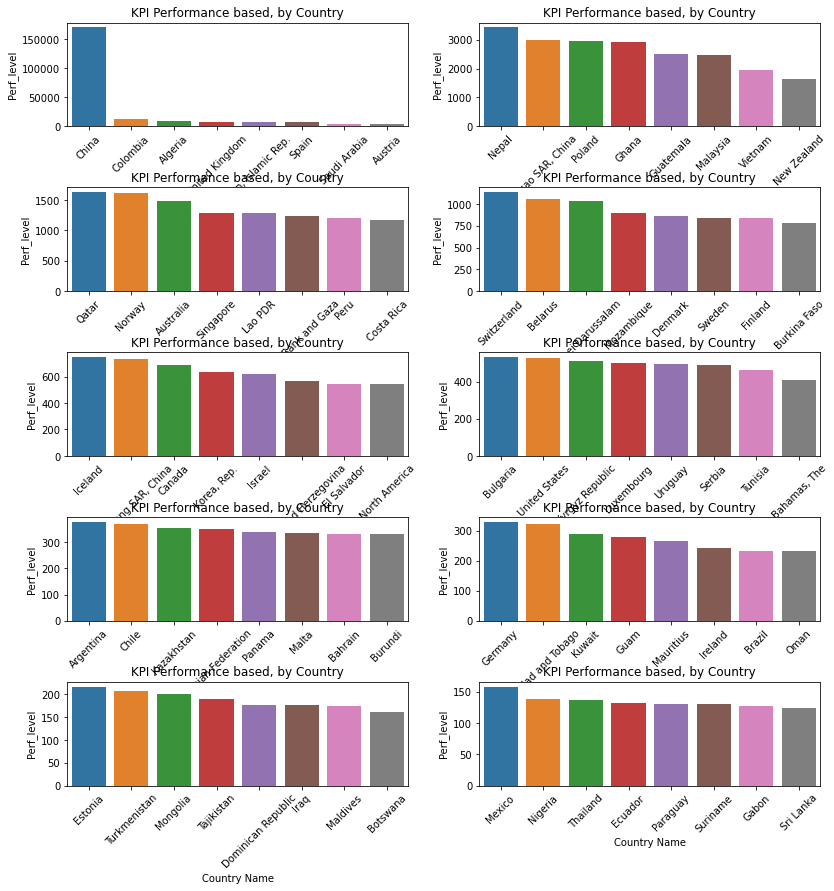

In [180]:
affiche(l_final)

### 7. Evolution du potentiel de ces clients.

#### Calcul taux de croissance estimé

In [181]:
futur.shape

(509, 4)

In [182]:
def total(arr):
    print(arr.shape)
    for i in range(arr.shape[0]):
        
        arr[i,-1:] = sum(arr[i,0:3])/(arr.shape[1] - 1)
    
    return arr

In [183]:
futur = total(futur)

(509, 4)


In [184]:
futur[0:2, :]

array([[13.49705711, 13.49705711, 13.49705711, 13.49705711],
       [ 0.2670034 ,  0.2670034 ,  0.2670034 ,  0.2670034 ]])

In [185]:
arr_futur = np.hstack((a, futur))

In [186]:
arr_futur[0:4,:]

array([['Afghanistan', 'AFG', 'gdp per capita (current us$)',
        'NY.GDP.PCAP.CD', 13.497057113595606, 13.497057113595606,
        13.497057113595606, 13.497057113595607],
       ['Afghanistan', 'AFG', 'internet users (per 100 people)',
        'IT.NET.USER.P2', 0.26700339843750004, 0.26700339843750004,
        0.26700339843750004, 0.26700339843750004],
       ['Albania', 'ALB', 'gdp per capita (current us$)',
        'NY.GDP.PCAP.CD', 12.897770038130147, 12.897770038130147,
        12.897770038130147, 12.897770038130147],
       ['Albania', 'ALB', 'internet users (per 100 people)',
        'IT.NET.USER.P2', 1.3396542054999998, 1.3396542054999998,
        1.3396542054999998, 1.3396542054999998]], dtype=object)

In [187]:
df_data_4_futur = pd.DataFrame(data=c, columns=['Country Name', 'Country Code',
                                               'Indicator Name', 'Indicator Code', 'Future_perf_lev'], index=[i for i in range(len(df_data_4))])

In [188]:
df_data_4_futur.sort_values('Future_perf_lev',ascending= False,inplace=True)

In [189]:
df_data_4_futur.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Future_perf_lev
97,China,CHN,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,172875.671429
100,Colombia,COL,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,11503.814286
8,Algeria,DZA,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,7858.771429
426,Spain,ESP,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,7670.757143
210,"Iran, Islamic Rep.",IRN,"teachers in tertiary education programmes, bot...",SE.TER.TCHR,7657.471429


In [190]:
df_data_4_futur.reset_index(drop=True, inplace=True)

In [191]:
df_data_4_futur.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Future_perf_lev
0,China,CHN,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,172875.671429
1,Colombia,COL,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,11503.814286
2,Algeria,DZA,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,7858.771429
3,Spain,ESP,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,7670.757143
4,"Iran, Islamic Rep.",IRN,"teachers in tertiary education programmes, bot...",SE.TER.TCHR,7657.471429


In [193]:
df_data_4_futur
df_data_4_futur_1 = df_data_4_futur.iloc[0:8,]
df_data_4_futur_2 = df_data_4_futur.iloc[8:16,]
df_data_4_futur_3 = df_data_4_futur.iloc[16:24,]
df_data_4_futur_4 = df_data_4_futur.iloc[24:32,]
df_data_4_futur_5 = df_data_4_futur.iloc[32:40,]
df_data_4_futur_6 = df_data_4_futur.iloc[40:48,]
df_data_4_futur_7 = df_data_4_futur.iloc[48:56,]
df_data_4_futur_8 = df_data_4_futur.iloc[56:64,]
df_data_4_futur_9 = df_data_4_futur.iloc[64:72,]
df_data_4_futur_10 = df_data_4_futur.iloc[72:80,]

l_futur = [df_data_4_futur_1, df_data_4_futur_2, df_data_4_futur_3, df_data_4_futur_4,
          df_data_4_futur_5, df_data_4_futur_6, df_data_4_futur_7, df_data_4_futur_8,
          df_data_4_futur_9, df_data_4_futur_10]

In [196]:
def affiche(l_dfs): # l_dfs est une liste de df
    # n_rows, n_cols représentent la disposition des graphes
    n_rows = 5
    n_cols = 2
    fig, axes = plt.subplots(n_rows,n_cols, squeeze=False, figsize=(12, 12))
    plt.tight_layout(pad=4.0)
        
    # Lire chaque df à partir de l_dfs ==> l_dfs[j]
    # Afficher le df dans chaque plot avec ax.flatten() qui donne les coordonnées de chq plot
        
    for j, ax in enumerate(axes.flatten()):

        sns.barplot(data= l_dfs[j], ax=ax, x=l_dfs[j]['Country Name'], y='Future_perf_lev')
        ax.set_title('KPI Estimated perf based, by Country')
        ax.tick_params(axis='x', labelrotation = 45)
    
    plt.show()
    
    return

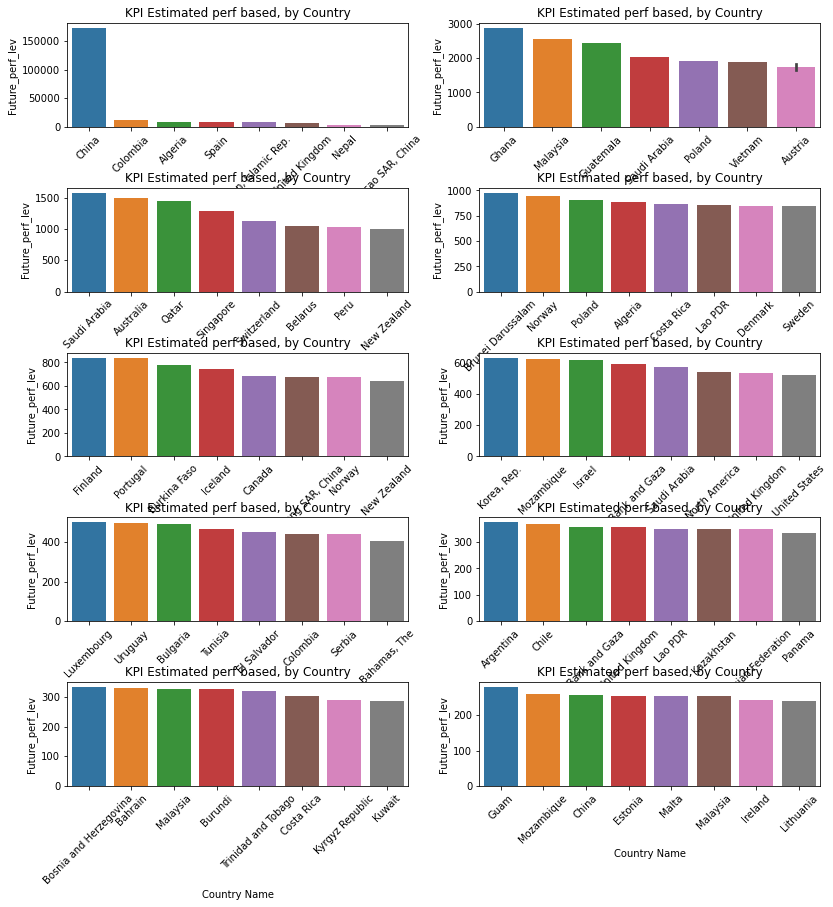

In [197]:
affiche(l_futur)

#### Liste des pays prioritaires

In [198]:
df_data_4_futur.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Future_perf_lev
0,China,CHN,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,172875.671429
1,Colombia,COL,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,11503.814286
2,Algeria,DZA,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,7858.771429
3,Spain,ESP,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,7670.757143
4,"Iran, Islamic Rep.",IRN,"teachers in tertiary education programmes, bot...",SE.TER.TCHR,7657.471429
5,United Kingdom,GBR,"graduates from tertiary education, both sexes ...",SE.TER.GRAD,7184.471429
6,Nepal,NPL,"teachers in secondary education, both sexes (n...",SE.SEC.TCHR,3401.2125
7,"Macao SAR, China",MAC,gdp per capita (current us$),NY.GDP.PCAP.CD,3022.556512
8,Ghana,GHA,"teachers in secondary education, both sexes (n...",SE.SEC.TCHR,2877.55
9,Malaysia,MYS,"teachers in secondary education, both sexes (n...",SE.SEC.TCHR,2559.771429


#### Conclusion:
- Les données sont à l'origine de mauvaise qualité.
- A cause de ce niveau de qualité faible, certains pays sont disqualifiés car trop peu d'indicateurs présents à cause d'une mauvaise qualité.
- Trop peu d'indicateurs induisent une relative faible performance.
- Certains pays sont mal classés à cause de cette faible performance. C'est la cas du Brésil qui aurait probablement mérité d'être parmi les pays prioritaires.